In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train_titanic.csv')
test=pd.read_csv('test_titanic.csv')


In [3]:
copy=test

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train.info())
print("----------------------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0 

In [6]:
#Dropping 'Cabin' column as it contains a lot of null values and 'Name' and 'Ticket' column too as they seem to carry less weightage

In [7]:
train=train.drop(['Name','Cabin','Ticket','PassengerId'],axis=1)
test=test.drop(['Name','Cabin','Ticket','PassengerId'],axis=1)

In [8]:
#Checking the relationship of numeric data with 'survived'

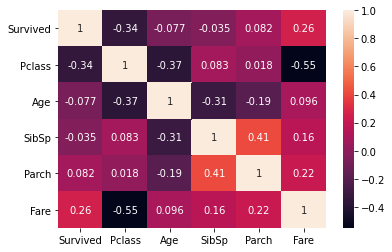

In [9]:
sns.heatmap(train.corr(),annot=True)

In [10]:
#from above heatmap we come to know Age depends strongly on Pclass

In [11]:
train.groupby('Pclass').Age.mean().reset_index().sort_values(by='Age',ascending=False)

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [12]:
#creating a function to fill in Age null values with mean age of different Pclass

In [13]:
def fill_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 25
    else :
        return age

In [14]:
train['Age']=train[['Age','Pclass']].apply(fill_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(fill_age,axis=1)

In [15]:
#Now visualizing different cities passengers are from

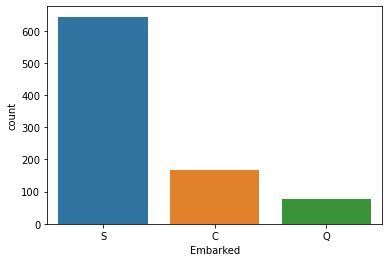

In [16]:
sns.countplot(train['Embarked'])

In [17]:
#Seeing this graph it would be good to fill the missing Embarked values with 'S'

In [18]:
train['Embarked']=train['Embarked'].fillna('S')
test['Embarked']=test['Embarked'].fillna('S')

In [19]:
#filling misssing Fare value of the test dataset

In [20]:
test['Fare'].fillna(value=test['Fare'].mean(),inplace=True)

In [21]:
#checking if there is anymore null values

In [22]:
train[train.isnull().any(axis=1)]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [23]:
test[test.isnull().any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [24]:
#Checking realtionship of non-numerical data with survived

In [25]:
train.groupby('Sex').Survived.mean().reset_index().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


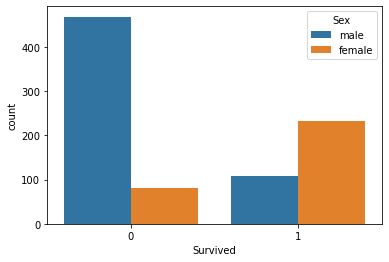

In [26]:
sns.countplot(x='Survived',hue='Sex',data=train)

In [27]:
train.groupby('Embarked').Survived.mean().reset_index().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


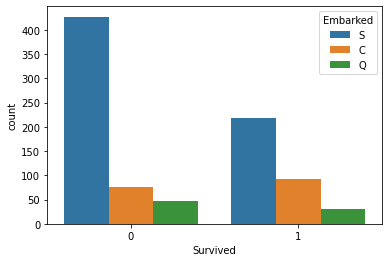

In [28]:
sns.countplot(x='Survived',hue='Embarked',data=train)

In [29]:
train.groupby('Pclass').Survived.mean().reset_index().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


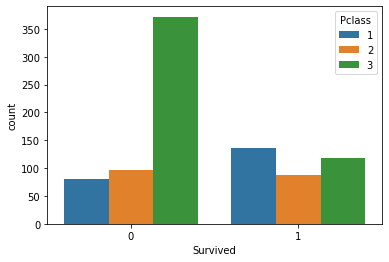

In [30]:
sns.countplot(x='Survived',hue='Pclass',data=train)

In [31]:
train.groupby('SibSp').Survived.mean().reset_index().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [32]:
#Our data contains categorical variablles also so using One-Hot Encoding to convert the categotical variables into numerics

In [33]:
print(train.select_dtypes(exclude=np.number).columns)

Index(['Sex', 'Embarked'], dtype='object')


In [34]:
train_ohe=pd.get_dummies(train,columns=["Pclass","Sex","SibSp","Parch","Embarked"],drop_first=True)
test_ohe=pd.get_dummies(test,columns=["Pclass","Sex","SibSp","Parch","Embarked"],drop_first=True)

In [35]:
#Dropping the first columns of one hot encoded columns to be safe from dummy variable trap

In [36]:
train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_2    891 non-null    uint8  
 4   Pclass_3    891 non-null    uint8  
 5   Sex_male    891 non-null    uint8  
 6   SibSp_1     891 non-null    uint8  
 7   SibSp_2     891 non-null    uint8  
 8   SibSp_3     891 non-null    uint8  
 9   SibSp_4     891 non-null    uint8  
 10  SibSp_5     891 non-null    uint8  
 11  SibSp_8     891 non-null    uint8  
 12  Parch_1     891 non-null    uint8  
 13  Parch_2     891 non-null    uint8  
 14  Parch_3     891 non-null    uint8  
 15  Parch_4     891 non-null    uint8  
 16  Parch_5     891 non-null    uint8  
 17  Parch_6     891 non-null    uint8  
 18  Embarked_Q  891 non-null    uint8  
 19  Embarked_S  891 non-null    u

In [37]:
test_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Fare        418 non-null    float64
 2   Pclass_2    418 non-null    uint8  
 3   Pclass_3    418 non-null    uint8  
 4   Sex_male    418 non-null    uint8  
 5   SibSp_1     418 non-null    uint8  
 6   SibSp_2     418 non-null    uint8  
 7   SibSp_3     418 non-null    uint8  
 8   SibSp_4     418 non-null    uint8  
 9   SibSp_5     418 non-null    uint8  
 10  SibSp_8     418 non-null    uint8  
 11  Parch_1     418 non-null    uint8  
 12  Parch_2     418 non-null    uint8  
 13  Parch_3     418 non-null    uint8  
 14  Parch_4     418 non-null    uint8  
 15  Parch_5     418 non-null    uint8  
 16  Parch_6     418 non-null    uint8  
 17  Parch_9     418 non-null    uint8  
 18  Embarked_Q  418 non-null    uint8  
 19  Embarked_S  418 non-null    u

In [38]:
test_ohe.drop(['Parch_9'],axis=1,inplace=True)

In [39]:
X=train_ohe.drop(['Survived'],axis=1)
y=train_ohe['Survived']
x_test=test_ohe

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
#Using Logistic Regression to fit the data and predict the new observations

In [42]:
from sklearn.linear_model import  LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\91969\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred=lr.predict(X_test)

In [44]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred)
recall_score = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

accuracy: 0.8059701492537313
precision: 0.7553191489361702
recall: 0.71
f1 score: 0.731958762886598


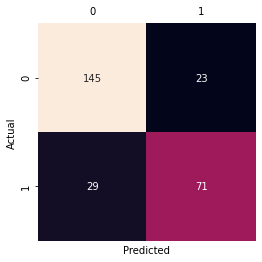

In [45]:
sns.heatmap(confusion_matrix,cbar=False,annot=True,square=True,fmt="d")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")

print("accuracy:",accuracy_score)
print("precision:",precision_score)
print("recall:",recall_score)
print("f1 score:",f1_score)

In [46]:
#Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [48]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_rf)
accuracy_score = metrics.accuracy_score(y_test, y_pred_rf)
precision_score = metrics.precision_score(y_test, y_pred_rf)
recall_score = metrics.recall_score(y_test, y_pred_rf)
f1_score = metrics.f1_score(y_test, y_pred_rf)

accuracy: 0.8171641791044776
precision: 0.7628865979381443
recall: 0.74
f1 score: 0.7512690355329948


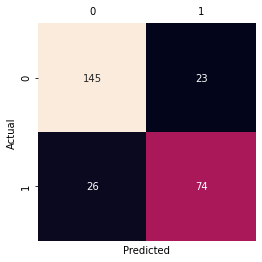

In [49]:
sns.heatmap(confusion_matrix,cbar=False,annot=True,square=True,fmt="d")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")

print("accuracy:",accuracy_score)
print("precision:",precision_score)
print("recall:",recall_score)
print("f1 score:",f1_score)

In [50]:
#Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)

In [52]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_dt)
accuracy_score = metrics.accuracy_score(y_test, y_pred_dt)
precision_score = metrics.precision_score(y_test, y_pred_dt)
recall_score = metrics.recall_score(y_test, y_pred_dt)
f1_score = metrics.f1_score(y_test, y_pred_dt)

accuracy: 0.8134328358208955
precision: 0.7717391304347826
recall: 0.71
f1 score: 0.7395833333333333


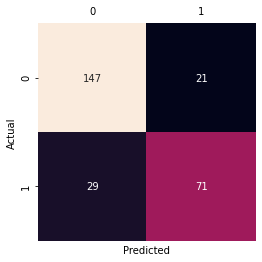

In [53]:
sns.heatmap(confusion_matrix,cbar=False,annot=True,square=True,fmt="d")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")

print("accuracy:",accuracy_score)
print("precision:",precision_score)
print("recall:",recall_score)
print("f1 score:",f1_score)

In [54]:
#Creating submission file

In [55]:
d1={'Passenger Id':copy['PassengerId'],'Survived':lr.predict(x_test)}
submission_lr=pd.DataFrame(d1)

In [56]:
d2={'Passenger Id':copy['PassengerId'],'Survived':rf.predict(x_test)}
submission_rf=pd.DataFrame(d2)

In [57]:
d3={'Passenger Id':copy['PassengerId'],'Survived':dt.predict(x_test)}
submission_dt=pd.DataFrame(d3)

In [58]:
submission_lr.to_csv(r'C:\Users\91969\Downloads\titanic_submission_lr.csv',index=False)
submission_dt.to_csv(r'C:\Users\91969\Downloads\titanic_submission_dt.csv',index=False)
submission_rf.to_csv(r'C:\Users\91969\Downloads\titanic_submission_rf.csv',index=False)